<a href="https://colab.research.google.com/github/rahuljungbahadur/hands_on_ml_book/blob/main/Rnn_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)

In [ ]:
ser1 = generate_time_series(1, 5)

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
n_steps = 50
series = generate_time_series(10000, n_steps)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [ ]:
import tensorflow as tf

In [ ]:
X_train.shape

(7000, 50, 1)

In [ ]:
y_pred = X_valid[:, -1]
np.mean(tf.keras.losses.mean_squared_error(y_valid, y_pred))

0.02146086

## Simple linear regression model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[50, 1]),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

validation loss is 0.004. This is much better than the naive forecast error `mse` of 0.020

## SimpleRNN

In [ ]:
model=tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=1, input_shape=(None, 1))]
)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X_train, y=y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0569 - val_loss: 0.0459
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0377 - val_loss: 0.0307
Epoch 3/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0249 - val_loss: 0.0206
Epoch 4/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0170 - val_loss: 0.0152
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 7/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0115 - val_loss: 0.0120
Epoch 8/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0120
Epoch 9/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0113 - val_loss: 0.0119
Epoch 10/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0112 - val_loss: 0.0119

## A deep SimpleRNN

In [ ]:
model_deepRnn = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True),
     tf.keras.layers.SimpleRNN(units=1, return_sequences=False)]
)

In [ ]:
model_deepRnn.compile(optimizer='adam', loss='mse')
model_deepRnn.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 9s 30ms/step - loss: 0.0185 - val_loss: 0.0052
Epoch 2/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 3/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0033 - val_loss: 0.0030
Epoch 4/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 5/10
219/219 [==============================] - 6s 28ms/step - loss: 0.0030 - val_loss: 0.0027
Epoch 6/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 7/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 8/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 9/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 10/10
219/219 [==============================] - 6s 29ms/step - loss: 0.0027 - val_lo

## SimpleRNN with `Dense` Layer at the end and no activation function

In [ ]:
model_deepRnnDense = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20),
     tf.keras.layers.Dense(units=1)]
)


model_deepRnnDense.compile(optimizer='adam', loss='mse')
model_deepRnnDense.fit(x=X_train, y=y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
219/219 [==============================] - 6s 22ms/step - loss: 0.0176 - val_loss: 0.0055
Epoch 2/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 3/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0036 - val_loss: 0.0033
Epoch 4/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 5/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 6/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0031 - val_loss: 0.0028
Epoch 7/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 8/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0030 - val_loss: 0.0030
Epoch 9/10
219/219 [==============================] - 4s 19ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 10/10
219/219 [==============================] - 4s 20ms/step - loss: 0.0029 - val_lo

## Creating predictions n steps in the future

Generate predictions and feed it back to the model for predicting the next timestep

In [ ]:
predictions = model_deepRnnDense.predict(X_test)

In [ ]:
predictions.shape

(1000, 1)

In [ ]:
predictions[0]

array([0.2250741], dtype=float32)

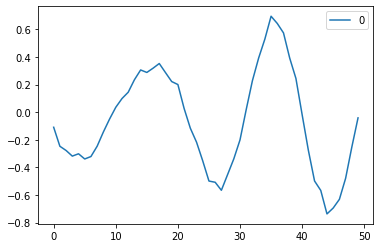

In [ ]:
pd.DataFrame(X_test[0]).plot(kind='line')

In [ ]:
## Generate time series for 1 batch and 50 steps

new_series = generate_time_series(1, 10)

In [ ]:
new_series.shape

(1, 10, 1)

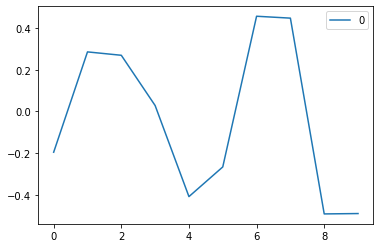

In [ ]:
pd.DataFrame(new_series[0]).plot()

In [ ]:
predicted1 = model_deepRnnDense.predict(new_series)
predicted1

array([[-0.8962373]], dtype=float32)

In [ ]:
predicted1.flatten()

array([-0.8962373], dtype=float32)

In [ ]:
X_new_series, y_new_series = X_test[157][:40,:], X_test[157][40:,:]
X_new_series.shape

(40, 1)

In [ ]:
X_new_series=X_new_series.reshape((1,40,1))

array([[0.39639023]], dtype=float32)

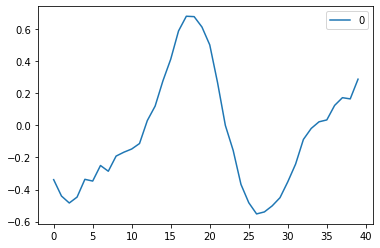

In [ ]:

pd.DataFrame(X_new_series[0]).plot()

model_deepRnnDense.predict(X_new_series)

In [ ]:
new_series=X_new_series

In [ ]:
series_pred=[]

for i in range(1,11):
  # print(i)
  pred_val = model_deepRnnDense.predict(new_series)
  new_series = new_series[:,1:,:]
  # print(new_series.shape)
  print((i, new_series.shape, pred_val.flatten()))
  series_pred.append(pred_val)

(1, (1, 39, 1), array([0.39639023], dtype=float32))
(2, (1, 38, 1), array([0.3931343], dtype=float32))
(3, (1, 37, 1), array([0.38657707], dtype=float32))
(4, (1, 36, 1), array([0.37638703], dtype=float32))
(5, (1, 35, 1), array([0.38206372], dtype=float32))
(6, (1, 34, 1), array([0.38399804], dtype=float32))
(7, (1, 33, 1), array([0.38994697], dtype=float32))
(8, (1, 32, 1), array([0.39250922], dtype=float32))
(9, (1, 31, 1), array([0.38089454], dtype=float32))
(10, (1, 30, 1), array([0.37348086], dtype=float32))


In [ ]:
y_new_series.shape

(10, 1)

In [ ]:
pred_array=np.concatenate(series_pred, axis=0)
pred_array

array([[0.39639023],
       [0.3931343 ],
       [0.38657707],
       [0.37638703],
       [0.38206372],
       [0.38399804],
       [0.38994697],
       [0.39250922],
       [0.38089454],
       [0.37348086]], dtype=float32)

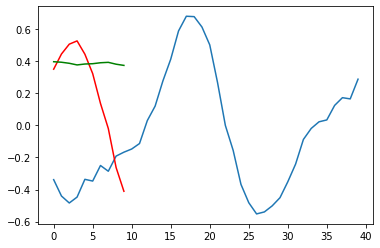

In [ ]:
plt.plot(X_new_series[0,:,:])
plt.plot(y_new_series, c='red')
plt.plot(pred_array, c='green')

## Another way to predict is to have the RNN itself output the next 10 sequences.

This is an example of Sequence-to-Sequence RNN.  

The advantage of this technique is that the loss will contain a term for the output of the RNN at each and every time step, not just the output at the last time step. This means there will be many more error gradients flowing through the model, and they won’t have to flow only through time; they will also flow from the output of each time step. This will both stabilize and speed up training.  


To turn the model into a sequence-to-sequence model, we must set return_sequences=True in all recurrent layers (even the last one), and we must apply the output Dense layer at every time step. Keras offers a TimeDistributed layer for this very purpose: it wraps any layer (e.g., a Dense layer) and applies it at every time step of its input sequence

In [232]:
help(np.empty)

Help on built-in function empty in module numpy:

empty(...)
    empty(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, without initializing entries.
    
    Parameters
    ----------
    shape : int or tuple of int
        Shape of the empty array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        Desired output data-type for the array, e.g, `numpy.int8`. Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of uninitialized (arbitrary) data of the given shape, dtype, and
        order.  Object arrays will be initialized to None.
    
    See Also
    --------
    empty_like : Return an empty array with shape and type of input.
    ones : Return a new array setting values to one.
    zeros : Return a new array 

In [233]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [234]:
model_deepRnn_MultiForeast = tf.keras.models.Sequential(
    [tf.keras.layers.SimpleRNN(units=20, return_sequences=True, input_shape=(None, 1)),
     tf.keras.layers.SimpleRNN(units=20, return_sequences=True),
     tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))]
)

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


### Create the error metric to be computed only at the end of the prediction

Since, we are now computing an output for 10 time steps, but, are only concerned about the error on the very last time step, we would need to create an error metric that computes mse for the very last timjestep of prediction

In [236]:
import tensorflow as tf

In [230]:
def last_step_error_metric(y_true, y_pred):
  return tf.keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])

In [238]:
model_deepRnn_MultiForeast.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                                   loss='mse',
                                   metrics=[last_step_error_metric])

In [241]:
np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    tf.keras.layers.SimpleRNN(20, return_sequences=True),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(10))
])

def last_time_step_mse(Y_true, Y_pred):
    return tf.keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.0508 - last_time_step_mse: 0.0400 - val_loss: 0.0429 - val_last_time_step_mse: 0.0324
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0395 - last_time_step_mse: 0.0283 - val_loss: 0.0363 - val_last_time_step_mse: 0.0260
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0325 - last_time_step_mse: 0.0214 - val_loss: 0.0368 - val_last_time_step_mse: 0.0279
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0298 - last_time_step_mse: 0.0188 - val_loss: 0.0273 - val_last_time_step_mse: 0.0155
Epoch 5/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0270 - last_time_step_mse: 0.0149 - val_loss: 0.0266 - val_last_time_step_mse: 0.0163
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0250 - last_time_step_mse: 0.0123 - val_loss: 0.0248 - val_last_time_step_mse: 0.0122
Epoch 7/20
219/219 [==

In [242]:
help(tf.keras.layers.RNN)

Help on class RNN in module keras.layers.recurrent:

class RNN(keras.engine.base_layer.Layer)
 |  RNN(*args, **kwargs)
 |  
 |  Base class for recurrent layers.
 |  
 |  See [the Keras RNN API guide](https://www.tensorflow.org/guide/keras/rnn)
 |  for details about the usage of RNN API.
 |  
 |  Args:
 |    cell: A RNN cell instance or a list of RNN cell instances.
 |      A RNN cell is a class that has:
 |      - A `call(input_at_t, states_at_t)` method, returning
 |        `(output_at_t, states_at_t_plus_1)`. The call method of the
 |        cell can also take the optional argument `constants`, see
 |        section "Note on passing external constants" below.
 |      - A `state_size` attribute. This can be a single integer
 |        (single state) in which case it is the size of the recurrent
 |        state. This can also be a list/tuple of integers (one size per state).
 |        The `state_size` can also be TensorShape or tuple/list of
 |        TensorShape, to represent high dime